# WeatherPy
----


### Analysis

- The most obvious trend analyzed from the weather data is that cities closest to the equator tend to be the warmest, and the cities furthest away, are the coldest. 
- A suprising find is that in the southern hemisphere, there is a negative relationship between latitude and humdity. I assumed the tropical islands would make it more positive, but after my analysis it is obvious that the desert cities near the equator is what makes the correlation negative. 
- There is no strong relationship between latitude and wind speed 



In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import (weather_api_key, g_key)

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#gmaps.configure(api_key=g_key)
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#query_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))


{
    "coord": {
        "lon": 147.0587,
        "lat": -42.7826
    },
    "weather": [
        {
            "id": 500,
            "main": "Rain",
            "description": "light rain",
            "icon": "10n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 48.52,
        "feels_like": 48.52,
        "temp_min": 47.91,
        "temp_max": 49.87,
        "pressure": 1002,
        "humidity": 85
    },
    "visibility": 10000,
    "wind": {
        "speed": 1.01,
        "deg": 340,
        "gust": 3
    },
    "rain": {
        "1h": 0.37
    },
    "clouds": {
        "all": 100
    },
    "dt": 1627334683,
    "sys": {
        "type": 2,
        "id": 2031307,
        "country": "AU",
        "sunrise": 1627334913,
        "sunset": 1627369664
    },
    "timezone": 36000,
    "id": 2155415,
    "name": "New Norfolk",
    "cod": 200
}


In [9]:
print(requests.get(query_url + city))


<Response [200]>


In [10]:
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

counter = 0

# Print Starting Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        
        city_record = response["name"]
        print(f"Processing Record {counter} | {city_record}")

        #increment processing record for each loop
        counter += 1
        
        
    except:
        print("City not found. Skipping...") 
    continue
#print end statement  
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")


Beginning Data Retrieval
-------------------------------
Processing Record 0 | Rikitea
Processing Record 1 | Kulhudhuffushi
City not found. Skipping...
Processing Record 2 | Chokurdakh
Processing Record 3 | Ponta do Sol
Processing Record 4 | Mar del Plata
Processing Record 5 | Areia Branca
Processing Record 6 | Tiksi
Processing Record 7 | Taoudenni
Processing Record 8 | Terråk
Processing Record 9 | Cidreira
Processing Record 10 | Khargupur
Processing Record 11 | Dikson
Processing Record 12 | Ribeira Grande
Processing Record 13 | Albany
Processing Record 14 | Ust-Nera
Processing Record 15 | Taltal
Processing Record 16 | Hobart
Processing Record 17 | Meulaboh
Processing Record 18 | Macas
Processing Record 19 | Vardø
Processing Record 20 | Russell
Processing Record 21 | Vaini
Processing Record 22 | Lata
Processing Record 23 | Avarua
Processing Record 24 | Laurel
Processing Record 25 | Marabba
Processing Record 26 | Ypsilanti
Processing Record 27 | Souillac
Processing Record 28 | Nuuk
Proc

Processing Record 229 | Ouro Sogui
City not found. Skipping...
Processing Record 230 | Ust-Maya
Processing Record 231 | Burla
Processing Record 232 | Zharkent
Processing Record 233 | Khatanga
Processing Record 234 | Kysyl-Syr
Processing Record 235 | Doka
Processing Record 236 | Stornoway
Processing Record 237 | São Gabriel da Cachoeira
Processing Record 238 | Brasília de Minas
Processing Record 239 | Tomatlán
Processing Record 240 | Shimanovsk
Processing Record 241 | Yangi Marg`ilon
Processing Record 242 | Artigas
Processing Record 243 | Verkhnyaya Inta
Processing Record 244 | Henties Bay
Processing Record 245 | Jati
Processing Record 246 | Westport
Processing Record 247 | Vila Franca do Campo
Processing Record 248 | Emba
Processing Record 249 | Lodja
Processing Record 250 | Sakaiminato
Processing Record 251 | Preston
Processing Record 252 | Peniche
Processing Record 253 | Conakry
Processing Record 254 | Omboué
Processing Record 255 | Ossora
City not found. Skipping...
Processing Recor

Processing Record 452 | Peleduy
Processing Record 453 | Olafsvik
Processing Record 454 | Cockburn Town
Processing Record 455 | Kintampo
Processing Record 456 | Kyren
Processing Record 457 | Tulun
Processing Record 458 | Altamont
City not found. Skipping...
Processing Record 459 | Calvinia
Processing Record 460 | College
Processing Record 461 | Sulina
Processing Record 462 | Srednekolymsk
Processing Record 463 | Grand Island
Processing Record 464 | Al Bardīyah
Processing Record 465 | Iquitos
Processing Record 466 | Basoko
Processing Record 467 | Mount Gambier
Processing Record 468 | Yatou
Processing Record 469 | Portland
Processing Record 470 | San Patricio
Processing Record 471 | Kyzyl-Mazhalyk
Processing Record 472 | Kidal
Processing Record 473 | Kaduna
Processing Record 474 | Sabang
Processing Record 475 | Tommot
Processing Record 476 | Saint George
Processing Record 477 | Monte Patria
Processing Record 478 | Azovo
Processing Record 479 | Mehamn
Processing Record 480 | Columbia
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
weather_df = pd.DataFrame({
    "City" : city_name,
    "Country" : country,
    "Date" : date,
    "Lat" : latitude,
    "Lng" : longitude,
    "Max Temp" : max_temperature,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed
    
        
})

weather_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,1627334590,-23.1203,-134.9692,74.08,76,99,18.23
1,Kulhudhuffushi,MV,1627334693,6.6221,73.0700,80.82,80,100,10.56
2,Chokurdakh,RU,1627334693,70.6333,147.9167,42.31,73,95,11.99
3,Ponta do Sol,PT,1627334694,32.6667,-17.1000,76.01,82,2,5.32
4,Mar del Plata,AR,1627334444,-38.0023,-57.5575,44.62,67,40,8.01
...,...,...,...,...,...,...,...,...,...
542,Caranavi,BO,1627334907,-15.8167,-67.5500,72.12,64,88,1.83
543,Yenagoa,NG,1627334907,4.9247,6.2642,74.19,77,100,5.46
544,Aiquile,BO,1627334907,-18.2041,-65.1807,70.41,35,52,10.74
545,Kenai,US,1627334907,60.5544,-151.2583,65.03,76,1,10.36


In [12]:
weather_df.to_csv("/Users/ryan/Desktop/bootcamp/homework/hw6_python-api/python-api-challenge/WeatherPy/weather_cities.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#check if any city has humidity > 100%
high_humidity = weather_df.loc[weather_df["Humidity"] > 100, :]
high_humidity

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

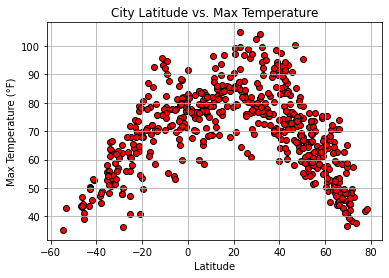

In [18]:
# Build Scatter Plot 
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolors="red", marker="o", edgecolor="black")

# set labels and titles
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("/Users/ryan/Desktop/bootcamp/homework/hw6_python-api/python-api-challenge/WeatherPy/Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

##### The code here is taking all the city latitude data and comparing it to its respective maxiumum temperture data.

## Latitude vs. Humidity Plot

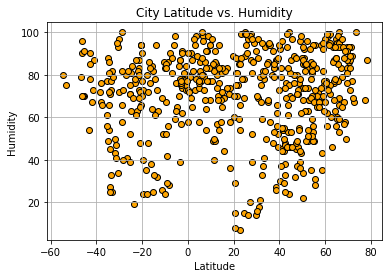

In [19]:
# Build Scatter Plot 
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolors="orange", marker="o", edgecolor="black")

# set labels and titles
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("/Users/ryan/Desktop/bootcamp/homework/hw6_python-api/python-api-challenge/WeatherPy/Latitude_vs_Humidity.png")

# Show Plot
plt.show()

##### The code runs the data on each cities latitude and plots it against its corresponding Humidity data.

## Latitude vs. Cloudiness Plot

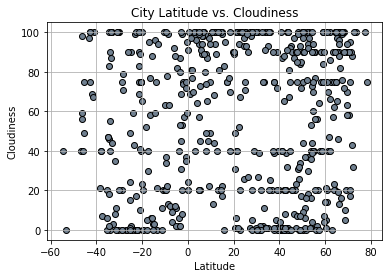

In [20]:
# Build Scatter Plot 
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolors="slategrey", marker="o", edgecolor="black")

# set labels and titles
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("/Users/ryan/Desktop/bootcamp/homework/hw6_python-api/python-api-challenge/WeatherPy/Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

#### The code runs the data on each cities latitude and plots it against its corresponding Cloudiness data.

## Latitude vs. Wind Speed Plot

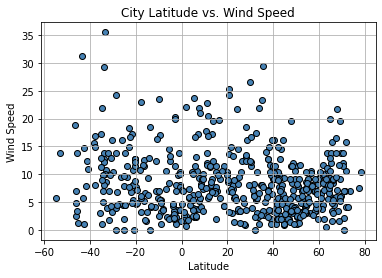

In [21]:
# Build Scatter Plot 
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolors="steelblue", marker="o", edgecolor="black")

# set labels and titles
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("/Users/ryan/Desktop/bootcamp/homework/hw6_python-api/python-api-challenge/WeatherPy/Latitude_vs_Wind-Speed.png")

# Show Plot
plt.show()

##### The code runs the data on each cities latitude and plots it against its corresponding Wind Speed data.

## Linear Regression

In [22]:
#create function to create linear regression in various calls
def linear_regression_plot(df, title_name, y_column, y_label, file_name, xy):

    #set x and y values
    x_values = df['Lat']
    y_values = df[y_column]

    # Perform a linear regression on x and y values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    #plot the line and label
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.title(title_name)
    
    print(f"The r-squared is: {rvalue}")
    
    plt.savefig(f"/Users/ryan/Desktop/bootcamp/homework/hw6_python-api/python-api-challenge/WeatherPy/{file_name}")
    
        

In [23]:
#create northern and southern hemisphere DataFrames
northern_hemi_df = weather_df.loc[weather_df["Lat"]>=0,:]
southern_hemi_df = weather_df.loc[weather_df["Lat"]<0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6578448696894608


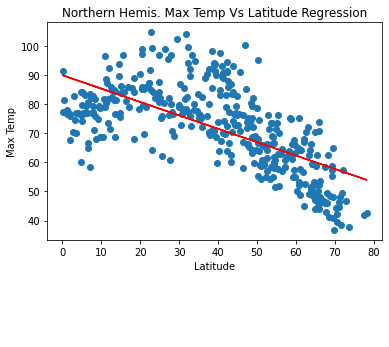

In [24]:
linear_regression_plot(northern_hemi_df,"Northern Hemis. Max Temp Vs Latitude Regression", 
                       'Max Temp', 'Max Temp', 'NorthernMaxTempVsLatitudeReg.png', (10,0))

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7735356181005335


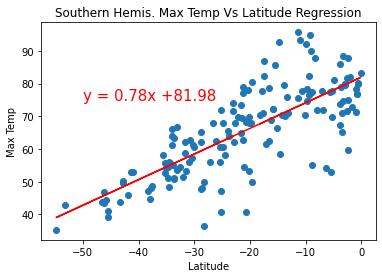

In [25]:
linear_regression_plot(southern_hemi_df,"Southern Hemis. Max Temp Vs Latitude Regression", 
                       'Max Temp', 'Max Temp', 'SouthernMaxTempVsLatitudeReg.png', (-50,75))

The linear regression shows the best fit line between max temperature in a city and its corresponding latitude. There is a strong positive relationship in the southern hemisphere and the inverse in the north. It goes to show the further a city is from the equator, the colder. And the closer the city is to the equator, the hotter. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0064122648529154995


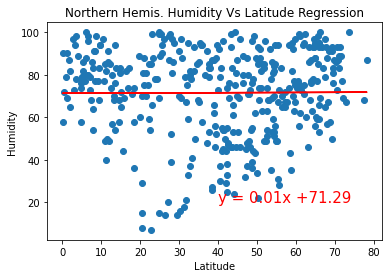

In [26]:
linear_regression_plot(northern_hemi_df,"Northern Hemis. Humidity Vs Latitude Regression", 
                       'Humidity', 'Humidity', 'NorthernHumidityVsLatitudeReg.png', (40,20))



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.020308767966498588


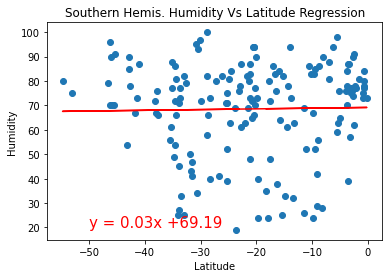

In [27]:
linear_regression_plot(southern_hemi_df,"Southern Hemis. Humidity Vs Latitude Regression", 
                       'Humidity', 'Humidity', 'SouthernHumidityVsLatitudeReg.png', (-50,20))



The linear regression shows the best fit line between humidity percentage in a city and its corresponding latitude. There is a weak positive relationship in the northern hemisphere and the inverse in the southern. The linear regression shows a weak correlation between humidity and latitude, so the cities furthest from the equator are more humid, in both hemispheres.  

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.09490335164439496


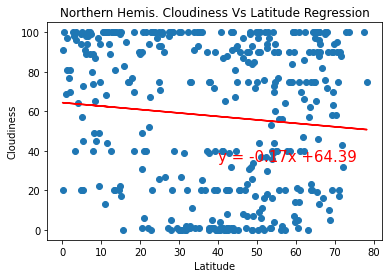

In [28]:
linear_regression_plot(northern_hemi_df,"Northern Hemis. Cloudiness Vs Latitude Regression", 
                       'Cloudiness', 'Cloudiness', 'NorthernCloudinessVsLatitudeReg.png', (40,35))



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.04197712226078245


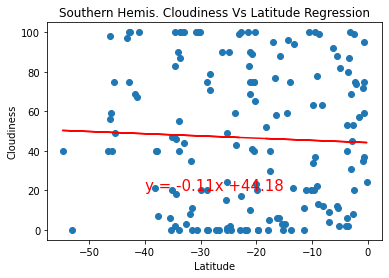

In [29]:
linear_regression_plot(southern_hemi_df,"Southern Hemis. Cloudiness Vs Latitude Regression", 
                       'Cloudiness', 'Cloudiness', 'SouthernCloudinessVsLatitudeReg.png', (-40,20))



The linear regression shows the best fit line between cloudiness percentage in a city and its corresponding latitude. There is a very weak negative relationship in the northern hemisphere and a slightly strong but still weak and negative relationship in the south. The linear regression shows a weak correlation between clouds and latitude, with the North having almost no correlation between the two at all. In the Southern Hemisphere, the cities closer to the equator have less clouds, according to the linear regression.   

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.12745291990754912


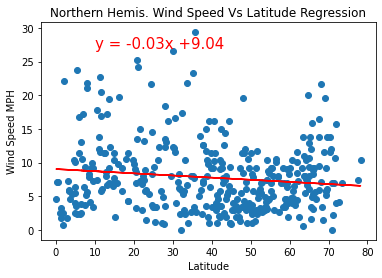

In [30]:
linear_regression_plot(northern_hemi_df,"Northern Hemis. Wind Speed Vs Latitude Regression", 
                       'Wind Speed', 'Wind Speed MPH', 'NorthernWindSpeedVsLatitudeReg.png', (10,27))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.20857352717975833


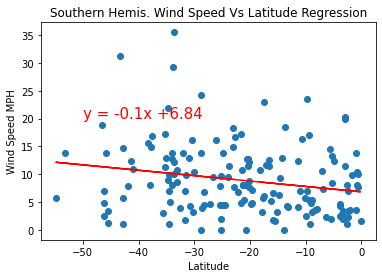

In [31]:
linear_regression_plot(southern_hemi_df,"Southern Hemis. Wind Speed Vs Latitude Regression", 
                       'Wind Speed', 'Wind Speed MPH', 'SouthernWindSpeedVsLatitudeReg.png', (-50,20))

The linear regression shows the best fit line between wind speed  in a city and its corresponding latitude. In both the northern and southern hemisphere there is a very very weak negative correlation between wind speed and latitude. So it is difficult to draw conclusions on where a city is, in relation to the equator, and how fast wind is in the city. 